In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import shutil
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df = pd.read_csv(r"C:\Users\dhars\Desktop\TRIMESTER 1\Practicals Study materials\PYDA\bmi.csv")
print(df.head())
print(df.info())

   Age  Height  Weight        Bmi       BmiClass
0   61    1.85  109.30  31.935720  Obese Class 1
1   60    1.71   79.02  27.023700     Overweight
2   60    1.55   74.70  31.092612  Obese Class 1
3   60    1.46   35.90  16.841809    Underweight
4   60    1.58   97.10  38.896010  Obese Class 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       741 non-null    int64  
 1   Height    741 non-null    float64
 2   Weight    741 non-null    float64
 3   Bmi       741 non-null    float64
 4   BmiClass  741 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 29.1+ KB
None


In [3]:
class Usecase:
    def dataPreprocessing(self):
        df = pd.read_csv(r"C:\Users\dhars\Desktop\TRIMESTER 1\Practicals Study materials\PYDA\bmi.csv")
        df = df.iloc[:51]
        df = df.dropna()
        return df

    def visualization_outliers(self, df):
        plt.figure(figsize=(10, 6))
        plt.xlabel("Bmi")
        plt.title("Identifying Outliers")
        sns.boxplot(y="Bmi", data=df)
        plt.show()

    def visualization_scatterplot(self, df):
        plt.figure(figsize=(10, 6))
        plt.xlabel("Height")
        plt.ylabel("Weight")
        plt.title("Height-Weight Comparison")
        sns.scatterplot(x="Height", y="Weight", data=df)
        plt.show()

    def visualization_barplot(self, df):
        df_subset = df.iloc[0:10]
        plt.figure(figsize=(10, 6))
        plt.title("BMI class and BMI")
        sns.barplot(x="BmiClass", y="Bmi", data=df_subset)
        plt.show()

    def visualization_histogram(self, df):
        plt.figure(figsize=(10, 6))
        plt.xlabel("Age")
        plt.ylabel("BMI")
        plt.title("Age-BMI Comparisons")
        sns.histplot(data=df, x="Age", y="Bmi")
        plt.show()
        
    def visualization_violinplot(self, df):
        sns.set(style="whitegrid")
        plt.figure(figsize=(10, 6))
        sns.violinplot(y="Bmi", data=df, inner="quartile", palette="pastel")
        plt.xlabel("BMI")
        plt.title("BMI Distribution - Violin Plot")
        plt.show()

    def visualization_heatmap(self, df):
        sns.set(style="whitegrid")
        plt.figure(figsize=(10, 6))
        pivot_table = df.pivot("Height", "Weight", "Bmi")
        sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
        plt.xlabel("Weight")
        plt.ylabel("Height")
        plt.title("BMI Heatmap Based on Height and Weight")
        plt.show()

    def visualization_piechart(self, df):
        plt.figure(figsize=(10, 6))
        bmi_class_counts = df['BmiClass'].value_counts()
        plt.pie(bmi_class_counts, labels=bmi_class_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
        plt.title('BMI Class Distribution')
        plt.show()
        
    def database_connectivity(self, df1):
        conn = sqlite3.connect('usecase.db')
        cursor = conn.cursor()
        df1.to_sql(name="BMIanalysis", con=conn, if_exists='replace', index=False)

        select_query = '''SELECT * FROM BMIanalysis  WHERE BmiClass LIKE "%Obese%"'''
        count_query = '''SELECT COUNT(*) AS Healthy_People FROM TopIMDBMovies WHERE Bmi>18&&Bmi<25'''
        highest_query = '''SELECT * FROM BMIanalysis WHERE Bmi IN (SELECT MAX(Bmi) FROM BMIanalysis)'''
        lowest_query = '''SELECT * FROM BMIanalysis WHERE Bmi IN (SELECT MIN(Bmi) FROM BMIanalysis)'''

        cursor.execute(select_query)
        results_unhealthy_people = cursor.fetchall()
        cursor.execute(count_query)
        result_healthy_people = cursor.fetchall()
        cursor.execute(highest_query)
        result_highest_bmi = cursor.fetchall()
        cursor.execute(lowest_query)
        result_lowest_bmi = cursor.fetchall()

        headers_unhealthy_people = [description[0] for description in conn.execute(select_query).description]
        headers_healthy_people = [description[0] for description in conn.execute(count_query).description]
        headers_highest_bmi = [description[0] for description in conn.execute(highest_query).description]
        headers_lowest_bmi = [description[0] for description in conn.execute(lowest_query).description]

        print("People at Risk:")
        print(tabulate(result_unhealthy_people, headers_unhealthy_people, tablefmt="grid"))
        print("\n")
        print("Count of Healthy People:")
        print(tabulate(result_healthy_people, headers_healthy_people, tablefmt="grid"))
        print("\n")
        print("Person with the Highest BMI:")
        print(tabulate(result_highest_bmi, headers_highest_bmi, tablefmt="grid"))
        print("\n")
        print("Person with the Lowest BMI:")
        print(tabulate(result_lowest_bmi, headers_lowest_bmi, tablefmt="grid"))

        conn.commit()
        cursor.close()
        conn.close()

    def dataset_linearregression(self, df):
        y = df["Weight"]
        x = df[["Height"]]
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=10)
        return x_train, x_test, y_train, y_test

usecase_instance = Usecase()
df = usecase_instance.dataPreprocessing()

In [4]:
usecase_instance.df

AttributeError: 'Usecase' object has no attribute 'df'

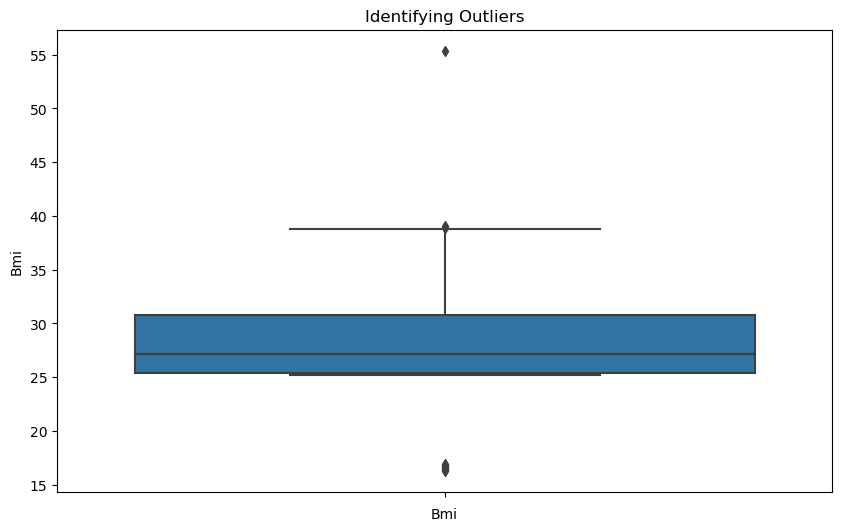

In [5]:
usecase_instance.visualization_outliers(df)

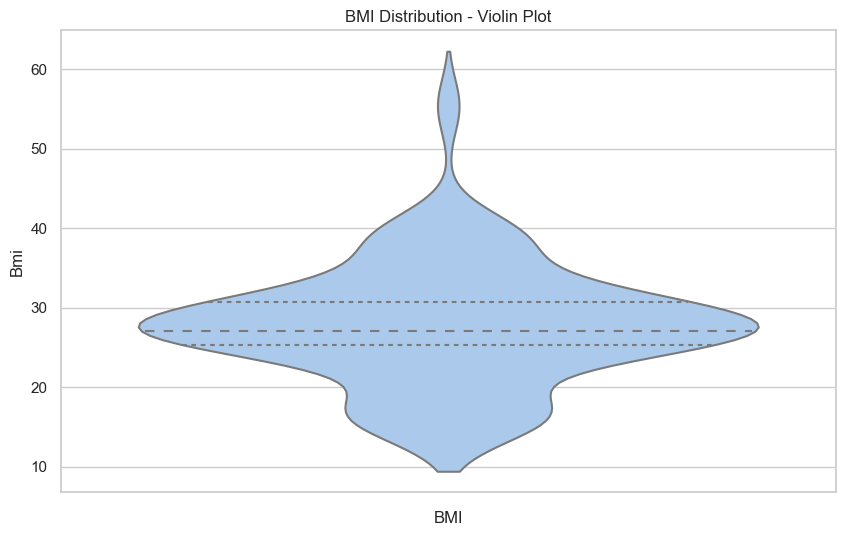

In [6]:
usecase_instance.visualization_violinplot(df)

In [ ]:
usecase_instance.visualization_scatterplot(df)

In [ ]:
usecase_instance.visualization_barplot(df)

In [ ]:
usecase_instance.visualization_histogram(df)

In [ ]:
usecase_instance.visualization_heatmap(df)

In [ ]:
usecase_instance.visualization_piechart(df)

In [7]:
usecase_instance.database_connectivity(df)

OperationalError: near "&": syntax error

In [11]:
#Setting value for x and y
df1 = usecase_instance.df
y= df["Weight"]
x= df[["Height"]]
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size=0.3,random_state= 10)
x_train

AttributeError: 'Usecase' object has no attribute 'df'

In [ ]:
 slr= LinearRegression()
slr.fit(x_train,y_train)

In [ ]:
print('Intercept:',slr.intercept_)
print('Coefficient:', slr.coef_)

In [ ]:
x_train = np.array(x_train).reshape(-1, 1)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
plt.scatter(x_train, y_train, color='blue')
plt.plot(x_train, y_pred, color='green')
plt.show()

In [ ]:
y_pred_slr = slr.predict(x_test)
print('Prediction result:{}'.format(y_pred_slr))

In [ ]:
slr_diff = pd.DataFrame({'Actual value': y_test,'Predicted Value': y_pred_slr}) slr_diff

In [ ]:
slr.predict([[1.58]])

In [ ]:
from sklearn.metrics import accuracy_score
print('R squared value: {:2f}'.format(slr.score(x,y)*100))

In [ ]:
MeanAbsErr = metrics.mean_absolute_error(y_test, y_pred_slr)
MeanSquErr = metrics.mean_squared_error(y_test, y_pred_slr)
RootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_slr))
print('Absolute Mean error:', round(MeanAbsErr, 3))
print('Mean Square error:', round(MeanSquErr, 3))
print('Root Mean Square error:', round(RootMeanSqErr, 3))
